In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import scipy.stats

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
def log10(L):return -math.log(L,10)

In [2]:
outDir=os.path.join('Figure')
if not os.path.exists(outDir):
    os.mkdir(outDir)


In [3]:
outDir

'Figure'

### Volcano Plot

In [4]:
def VolcanoPlot_anno(Dir, y,name, TXT, text = [], col = ['darkgray', '#7D2125', '#39518F'], FC = 0.585, P =0.05,alpha=0.85, Border_rm = False):
    data = pd.read_csv(Dir+'/HvsC_DEgene_all.txt',sep='\t',index_col=0)
    
    FOLD=data['log2FoldChange']
    pval=data['p-value']
    pvalue=pval.apply(log10)
    P = log10(P)
    
    h_up=(FOLD>FC)&(pvalue>P) 
    c_up=(FOLD<-FC)&(pvalue>P) 
    
    Dif=pd.DataFrame({'FOLD':FOLD,'pvalue':pvalue})
    Dif_h=Dif[h_up]
    Dif_c=Dif[c_up]
    Dif_text=Dif.loc[text]

    plt.style.use('seaborn-white')
    fig=plt.figure(figsize=(6,6))
    ax=fig.add_axes([0.2,0.2,0.7,0.7])
    ax.tick_params(axis='y',length=5,labelsize=14,direction='out')
    ax.tick_params(axis='x',length=5,labelsize=14,direction='out')
    ax.set_ylabel('-log10 P-value',fontsize=14)
    ax.set_xlabel('log2(FoldChange)',fontsize=14)
    ax.set_xlim([-9,9])
    ax.set_ylim([-0.3,y])
    ax.scatter(Dif['FOLD'],Dif['pvalue'],c=col[0],alpha=0.35,s=6,edgecolor='none')
    
    ax.scatter(Dif_h['FOLD'],Dif_h['pvalue'],c=col[1],alpha=alpha,s=16,edgecolor='none')
    ax.scatter(Dif_c['FOLD'],Dif_c['pvalue'],c=col[2],alpha=alpha,s=16,edgecolor='none')
    ax.axhline(y=P,ls='--',color=col[0],alpha=0.6)
    ax.axvline(x=-FC,ls='--',color=col[0],alpha=0.6)
    ax.axvline(x=FC,ls='--',color=col[0],alpha=0.6)
    
    if Border_rm:
        ax.spines['right'].set_linewidth(0.0)
        ax.spines['top'].set_linewidth(0.0)
    
    if TXT:
        for i in range(len(Dif_text['FOLD'])):
            plt.annotate(list(Dif_text.index)[i], xy = (Dif_text['FOLD'][i], Dif_text['pvalue'][i]), xytext = (Dif_text['FOLD'][i]-2, Dif_text['pvalue'][i]+2),fontsize=13,
                         arrowprops=dict(facecolor='black',alpha=0.9,arrowstyle='-'))
        plt.savefig(Dir+'/Volcanoplot_{}_text.pdf'.format(name),dpi=600)
        plt.show()
    else:
        plt.savefig(Dir+'/Volcanoplot_{}.pdf'.format(name),dpi=600)
        plt.show()



/var/folders/_9/2jhsp7j53t795_ttz0d8x8yc0000gn/T/ipykernel_72382/715476657.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


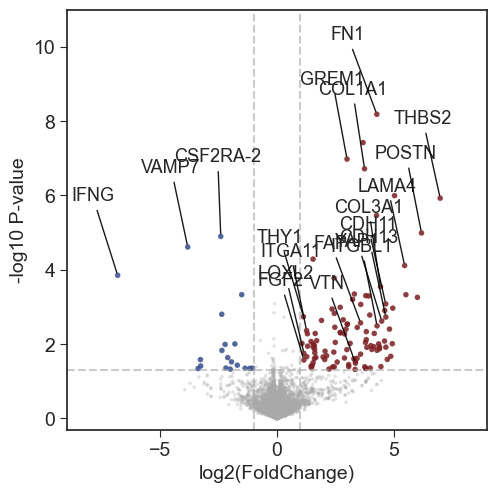

In [5]:
Dir='Data/volcano'

VolcanoPlot_anno(Dir,11,
                 name = 'FC_1_14', 
                 TXT = True, 
                 text = ['COL1A1','LAMA4','POSTN','THBS2','YAP1','CSF2RA-2','VAMP7','IFNG',
                         'CDH13','FAP','FGF2','LOXL2','GREM1','CDH11','COL3A1','FN1','THY1','VTN','ITGBL1','ITGA11'
                        ], 
                 FC = 1)

### GO_BP Pathway

In [6]:
DataDir = 'Data/GO_term'

In [7]:
F = DataDir+'/Go_term_BP.csv'
GO_term = pd.read_csv(F,sep=',',index_col=0)
GO_term.head(3)

,Term,Description,LogP,Log(q-value),InTerm_InList,Genes,Symbols,Group
Category,,,,,,,,
GO Biological Processes,GO:0030198,extracellular matrix organization,-21.612411,-18.01,21/274,"857,1277,1278,1281,1282,1284,1290,1303,3491,39...","CAV1,COL1A1,COL1A2,COL3A1,COL4A1,COL4A2,COL5A2...",up
GO Biological Processes,GO:0043062,extracellular structure organization,-21.579090,-18.01,21/275,"857,1277,1278,1281,1282,1284,1290,1303,3491,39...","CAV1,COL1A1,COL1A2,COL3A1,COL4A1,COL4A2,COL5A2...",up
GO Biological Processes,GO:0045229,external encapsulating structure organization,-21.512837,-18.01,21/277,"857,1277,1278,1281,1282,1284,1290,1303,3491,39...","CAV1,COL1A1,COL1A2,COL3A1,COL4A1,COL4A2,COL5A2...",up


In [8]:
GO_term['-LogP'] = -GO_term['LogP']

In [9]:
GO_term.head(3)

,Term,Description,LogP,Log(q-value),InTerm_InList,Genes,Symbols,Group,-LogP
Category,,,,,,,,,
GO Biological Processes,GO:0030198,extracellular matrix organization,-21.612411,-18.01,21/274,"857,1277,1278,1281,1282,1284,1290,1303,3491,39...","CAV1,COL1A1,COL1A2,COL3A1,COL4A1,COL4A2,COL5A2...",up,21.612411
GO Biological Processes,GO:0043062,extracellular structure organization,-21.579090,-18.01,21/275,"857,1277,1278,1281,1282,1284,1290,1303,3491,39...","CAV1,COL1A1,COL1A2,COL3A1,COL4A1,COL4A2,COL5A2...",up,21.579090
GO Biological Processes,GO:0045229,external encapsulating structure organization,-21.512837,-18.01,21/277,"857,1277,1278,1281,1282,1284,1290,1303,3491,39...","CAV1,COL1A1,COL1A2,COL3A1,COL4A1,COL4A2,COL5A2...",up,21.512837


In [10]:
GO_term = GO_term.sort_values(by=['Group', '-LogP'])  #,ascending=False

In [11]:
my_color = np.where(GO_term['Group']=='up', '#9D3335', '#465692')

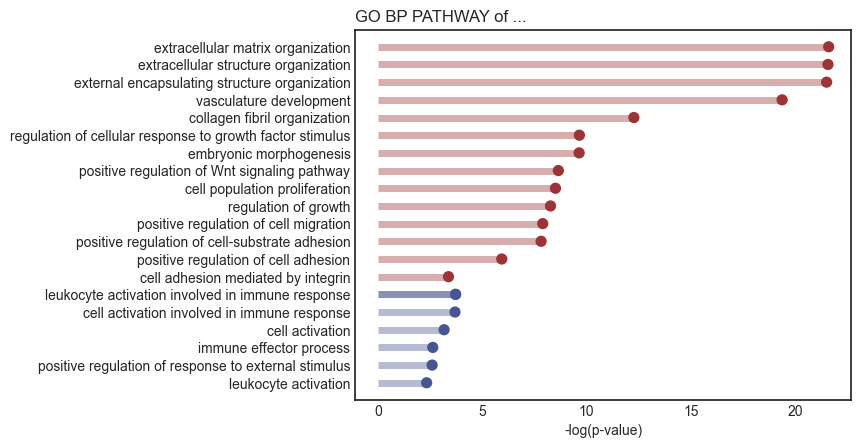

In [12]:
plt.hlines(y=GO_term['Description'], xmin=0, xmax=GO_term['-LogP'], linewidth=5, color=my_color, alpha=0.4)
plt.scatter(GO_term['-LogP'], GO_term['Description'], color=my_color, s=50, alpha=1)
plt.title("GO BP PATHWAY of ...", loc='left')
plt.xlabel('-log(p-value)')
plt.savefig(outDir+'/Go_BP.pdf',bbox_inches = 'tight')
plt.show()